<a href="https://www.kaggle.com/code/sudhanshu2198/rain-prediction-in-australia-using-neural-networks?scriptVersionId=93716545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"]=(12,8)

In [4]:
data=pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.shape

(145460, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
data.isnull().sum()/len(data)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

**Drop row for which target label is not provided**

In [9]:
data=data[(data["RainTomorrow"]=="Yes")|(data["RainTomorrow"]=="No")]

**Evaporation, Sunshine, Cloud9am, Cloud3pm have high percentage of them missing**

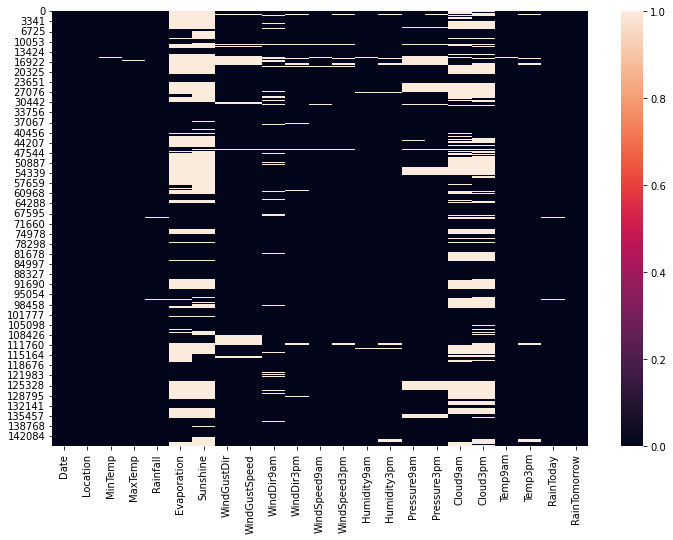

In [10]:
sns.heatmap(data.isnull());

**There are numeric and categorical columns in the data**

In [11]:
numeric_col=data.select_dtypes(include="float64").columns
numeric_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [12]:
cat_col=data.select_dtypes(include="object").columns
cat_col

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

**Checking for cardinality of categorical columns**

In [13]:
for col in cat_col:
    print(f"{col}: {data[col].nunique()}")

Date: 3436
Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


**Only Date column have very high cardinality(no of unique value) and we will convert it to datetime**

In [14]:
data["Date"]=pd.to_datetime(data["Date"])

In [15]:
data["year"]=data["Date"].dt.year
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day

data.drop("Date",axis=1,inplace=True)

In [16]:
data.duplicated().sum()

0

**Visualization**

In [17]:
s=data["RainTomorrow"].value_counts()

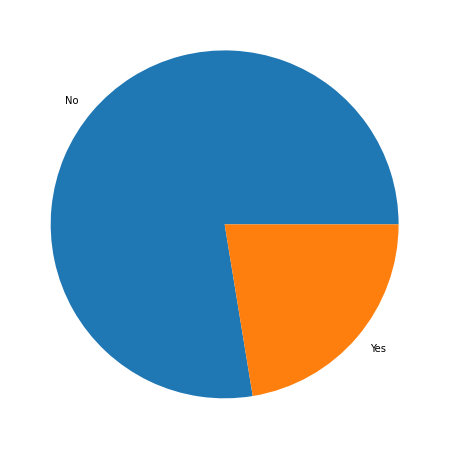

In [18]:
plt.pie(s,labels=s.index);

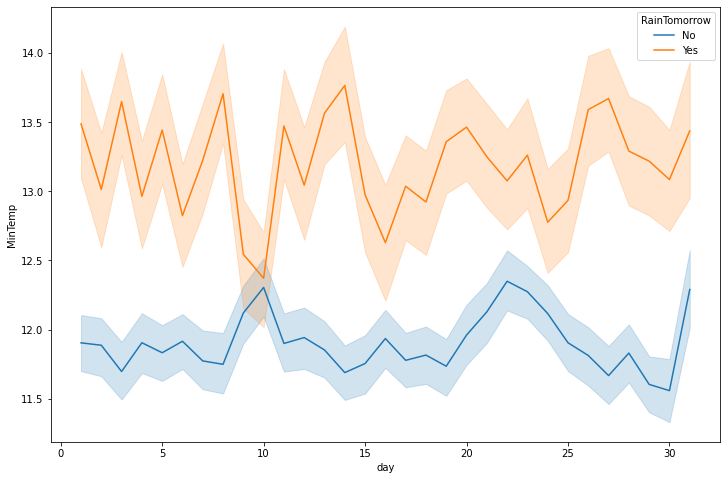

In [19]:
sns.lineplot(x="day",y="MinTemp",hue="RainTomorrow",data=data);

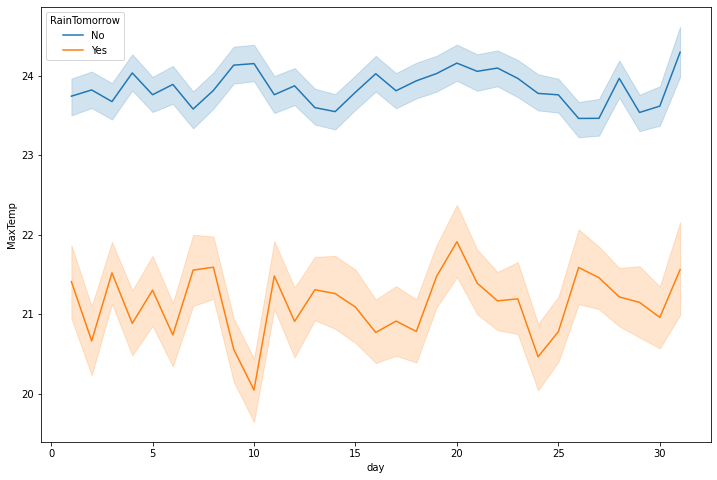

In [20]:
sns.lineplot(x="day",y="MaxTemp",hue="RainTomorrow",data=data);

**If temperature difference between min and max temperature is low then probality of rain occuring tommorrow is more**

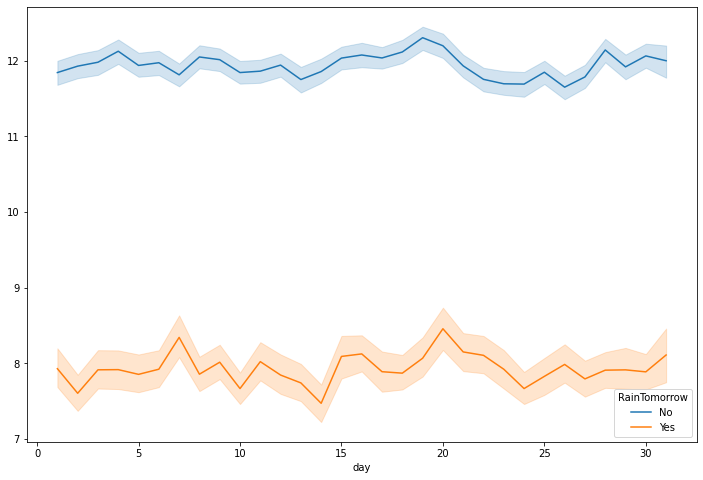

In [21]:
sns.lineplot(x=data["day"],y=(data["MaxTemp"]-data["MinTemp"]),hue=data["RainTomorrow"]);

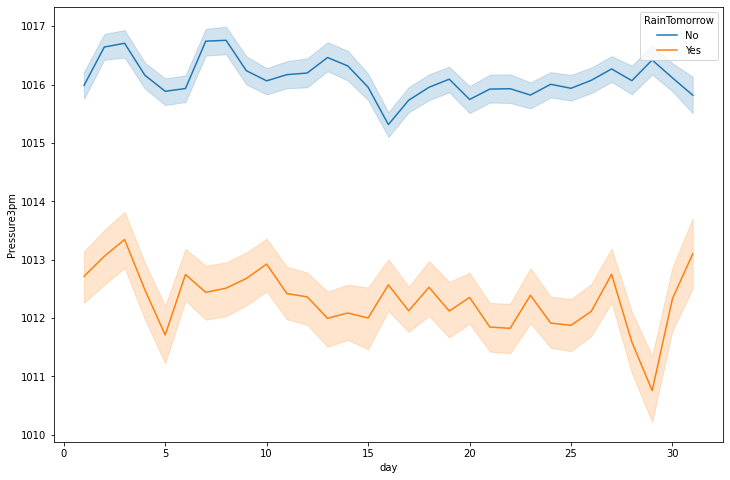

In [22]:
sns.lineplot(x=data["day"],y=data["Pressure3pm"],hue=data["RainTomorrow"]);

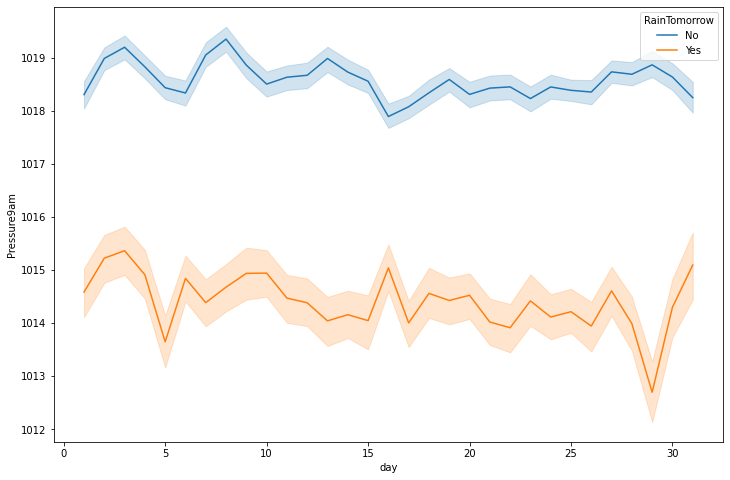

In [23]:
sns.lineplot(x=data["day"],y=data["Pressure9am"],hue=data["RainTomorrow"]);

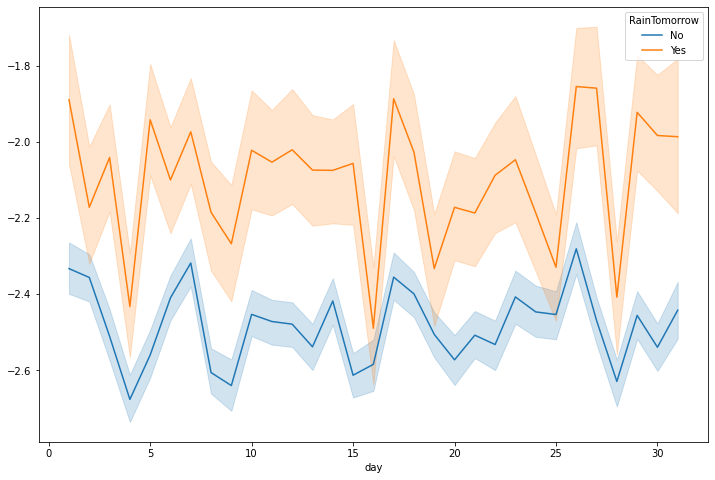

In [24]:
sns.lineplot(x=data["day"],y=(data["Pressure3pm"]-data["Pressure9am"]),hue=data["RainTomorrow"]);

**So using difference between two values may result into strong correlation or not, we will heatmap to visualize the impact of differencing**

* for MinTemp and MaxTemp it works
* for Pressure difference it doesn't

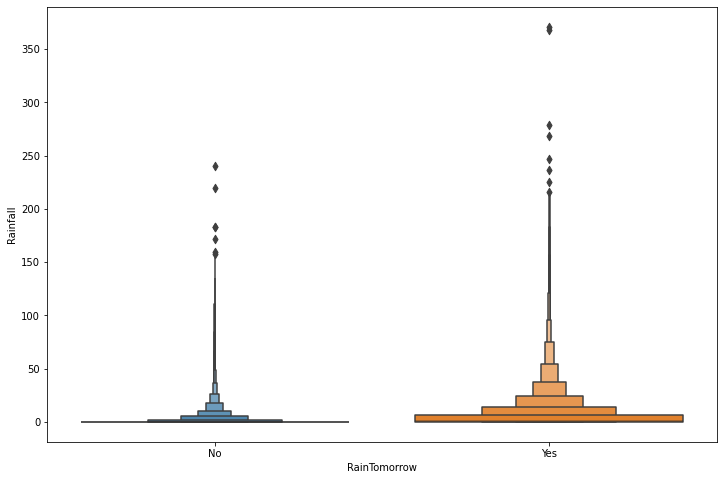

In [25]:
sns.boxenplot(y="Rainfall",x="RainTomorrow",data=data);

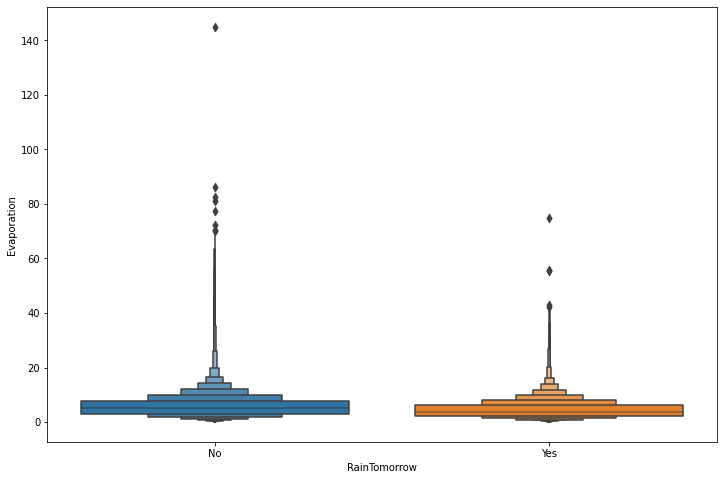

In [26]:
sns.boxenplot(y="Evaporation",x="RainTomorrow",data=data);

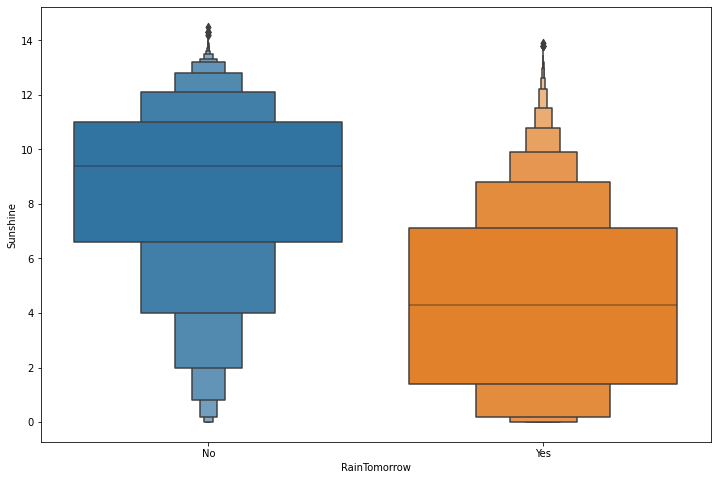

In [27]:
sns.boxenplot(y="Sunshine",x="RainTomorrow",data=data);

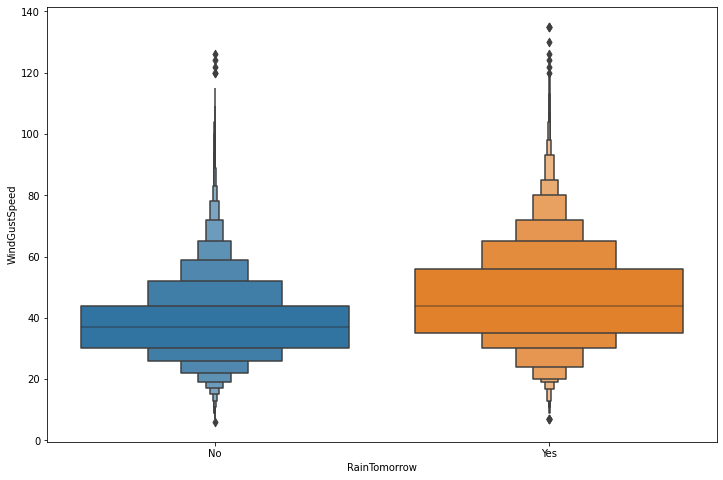

In [28]:
sns.boxenplot(y="WindGustSpeed",x="RainTomorrow",data=data);

**From Boxplots**

There are outliers in the dataset

WindGustSpeed, Sunshine and Rainfall affect probability of rain

**Text Preprocessing**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
data["RainTomorrow"].replace({"No":0,"Yes":1},inplace=True)

In [31]:
X=data.drop("RainTomorrow",axis=1)
y=data["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

**Categorical Columns**

In [32]:
cat_col=X_train.select_dtypes(include="object").columns
cat_col

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [33]:
X_train[cat_col].isnull().sum()/len(data)*100

Location       0.000000
WindGustDir    5.583257
WindDir9am     6.020690
WindDir3pm     2.258902
RainToday      0.872757
dtype: float64

In [34]:
X_test[cat_col].isnull().sum()/len(data)*100

Location       0.000000
WindGustDir    0.978248
WindDir9am     1.021147
WindDir3pm     0.398051
RainToday      0.116039
dtype: float64

In [35]:
for col in cat_col:
    X_train[col].fillna(X_train[col].mode()[0],inplace=True)
    X_test[col].fillna(X_train[col].mode()[0],inplace=True)

In [36]:
for col in cat_col:
    print(X_train[col].nunique())

49
16
16
16
2


In [37]:
X_train=pd.get_dummies(X_train,drop_first=True,columns=cat_col)
X_test=pd.get_dummies(X_test,drop_first=True,columns=cat_col)

**Numerical columns**

In [38]:
numeric_col=X_train.select_dtypes(include="float64").columns
numeric_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [39]:
X_train[numeric_col].isnull().sum()/len(data)*100

MinTemp           0.394534
MaxTemp           0.196212
Rainfall          0.872757
Evaporation      36.427250
Sunshine         40.582870
WindGustSpeed     5.544577
WindSpeed9am      0.812276
WindSpeed3pm      1.571807
Humidity9am       1.064047
Humidity3pm       2.168180
Pressure9am       8.383676
Pressure3pm       8.361874
Cloud9am         32.129570
Cloud3pm         34.176788
Temp9am           0.547144
Temp3pm           1.636508
dtype: float64

In [40]:
X_test[numeric_col].isnull().sum()/len(data)*100

MinTemp          0.053448
MaxTemp          0.030241
Rainfall         0.116039
Evaporation      6.361776
Sunshine         7.110055
WindGustSpeed    0.974732
WindSpeed9am     0.135731
WindSpeed3pm     0.277791
Humidity9am      0.183553
Humidity3pm      0.370623
Pressure9am      1.471943
Pressure3pm      1.470537
Cloud9am         5.605761
Cloud3pm         5.975681
Temp9am          0.088612
Temp3pm          0.280605
dtype: float64

In [41]:
for col in numeric_col:
    X_train[col].fillna(X_train[col].median(),inplace=True)
    X_test[col].fillna(X_train[col].median(),inplace=True)

**Standardization**

In [42]:
from sklearn.preprocessing import StandardScaler

scaled=StandardScaler()
scaled.fit(X_train)

train=scaled.transform(X_train)
test=scaled.transform(X_test)

X_train=pd.DataFrame(X_train,columns=X_train.columns)
X_test=pd.DataFrame(X_test,columns=X_test.columns)

**Outliers Removal**

In [43]:
X_train[numeric_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,120864.0,12.181922,6.382621,-8.5,7.6,12.0,16.8,33.9
MaxTemp,120864.0,23.226603,7.107816,-4.8,17.9,22.6,28.2,48.1
Rainfall,120864.0,2.324821,8.428040,0.0,0.0,0.0,0.6,371.0
Evaporation,120864.0,5.184236,3.203832,0.0,4.0,4.8,5.4,145.0
Sunshine,120864.0,8.042428,2.768142,0.0,8.2,8.5,8.7,14.5
WindGustSpeed,120864.0,39.910031,13.122313,6.0,31.0,39.0,46.0,135.0
WindSpeed9am,120864.0,13.986232,8.849858,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,120864.0,18.640182,8.713964,0.0,13.0,19.0,24.0,87.0
Humidity9am,120864.0,68.832514,18.949971,0.0,57.0,70.0,83.0,100.0
Humidity3pm,120864.0,51.488566,20.545375,0.0,37.0,52.0,65.0,100.0


**On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.**

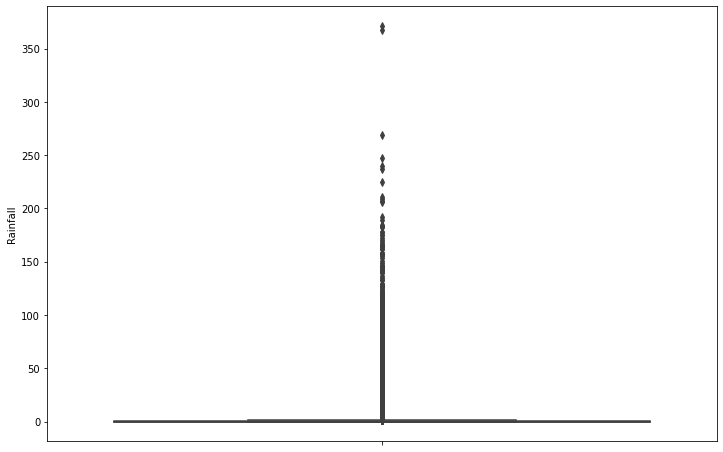

In [44]:
sns.boxplot(y=X_train['Rainfall']);

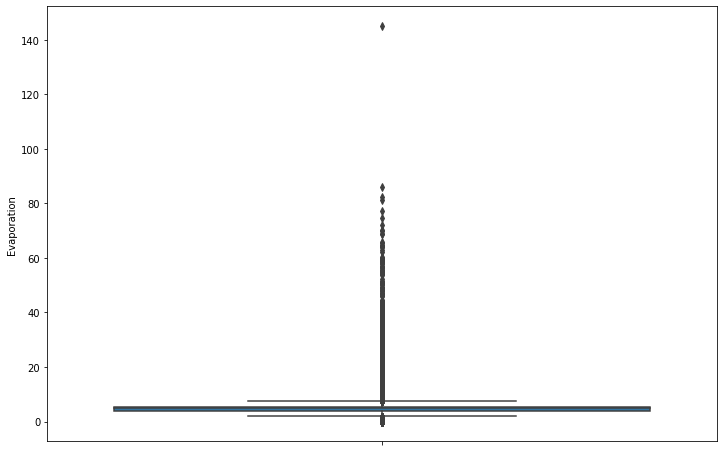

In [45]:
sns.boxplot(y=X_train['Evaporation']);

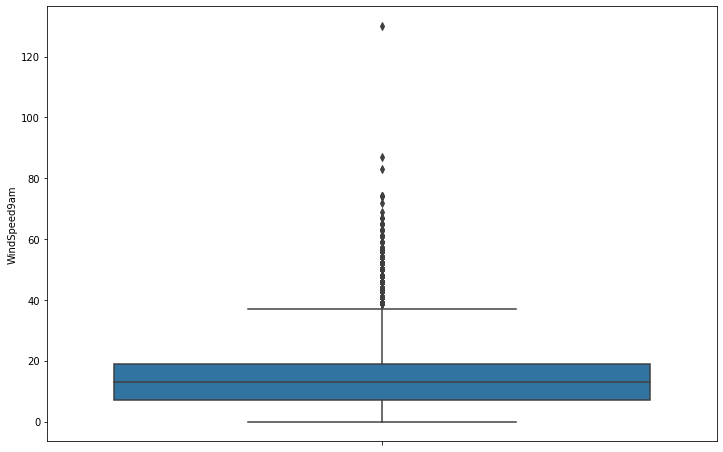

In [46]:
sns.boxplot(y=X_train['WindSpeed9am']);

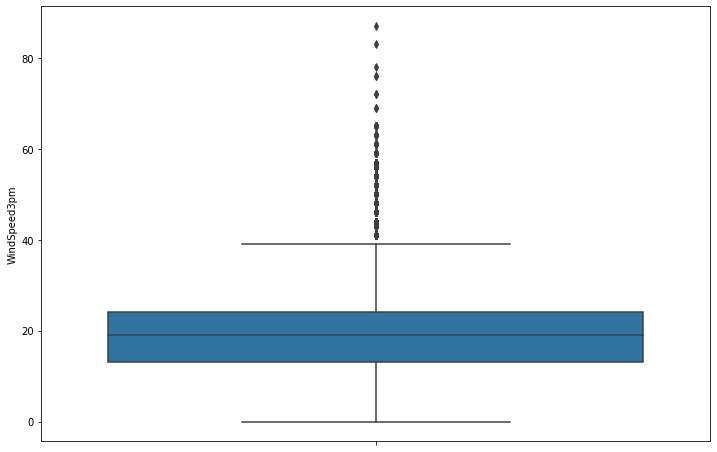

In [47]:
sns.boxplot(y=X_train['WindSpeed3pm']);

In [48]:
for col in ["Rainfall","Evaporation","WindSpeed9am","WindSpeed3pm"]:
    q1=np.quantile(X_train[col],0.25)
    q3=np.quantile(X_train[col],0.75)
    iqr=q3-q1
    
    lower=round(q1-1.5*iqr,2)
    upper=round(q3+1.5*iqr,2)
    
    print(f"{col}: |upper: {upper} |lower: {lower}")

Rainfall: |upper: 1.5 |lower: -0.9
Evaporation: |upper: 7.5 |lower: 1.9
WindSpeed9am: |upper: 37.0 |lower: -11.0
WindSpeed3pm: |upper: 40.5 |lower: -3.5


In [49]:
X_train=X_train[(X_train[col]<upper)&(X_train[col]>lower)]
X_test=X_test[(X_test[col]<upper)&(X_test[col]>lower)]

**By removing outliers we have removed rows fron features dataset(X_train and X_test) and not from target dataset therefore they will be of different dimension and we will use inner join to have same no of rows**

**Making the features and target datasets of same size**

In [50]:
train=pd.concat([X_train,y_train],axis=1,join="inner")
test=pd.concat([X_test,y_test],axis=1,join="inner")

**Feature Engineering**

In [51]:
train["WindSpeed_diff"]=train["WindSpeed3pm"]-train["WindSpeed9am"]
train["Humidity_diff"]=train["Humidity3pm"]-train["Humidity9am"]
train["Pressure_diff"]=train["Pressure3pm"]-train["Pressure9am"]
train["Cloud_diff"]=train["Cloud3pm"]-train["Cloud9am"]
train["Temp_diff"]=train["Temp3pm"]-train["Temp9am"]
train["MinMax_diff"]=train["MaxTemp"]-train["MinTemp"]

test["WindSpeed_diff"]=test["WindSpeed3pm"]-test["WindSpeed9am"]
test["Humidity_diff"]=test["Humidity3pm"]-test["Humidity9am"]
test["Pressure_diff"]=test["Pressure3pm"]-test["Pressure9am"]
test["Cloud_diff"]=test["Cloud3pm"]-test["Cloud9am"]
test["Temp_diff"]=test["Temp3pm"]-test["Temp9am"]
test["MinMax_diff"]=test["MaxTemp"]-test["MinTemp"]

In [52]:
col=['MinTemp', 'MaxTemp', 'WindSpeed9am','WindSpeed3pm', 
     'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm',
     'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm','RainTomorrow']

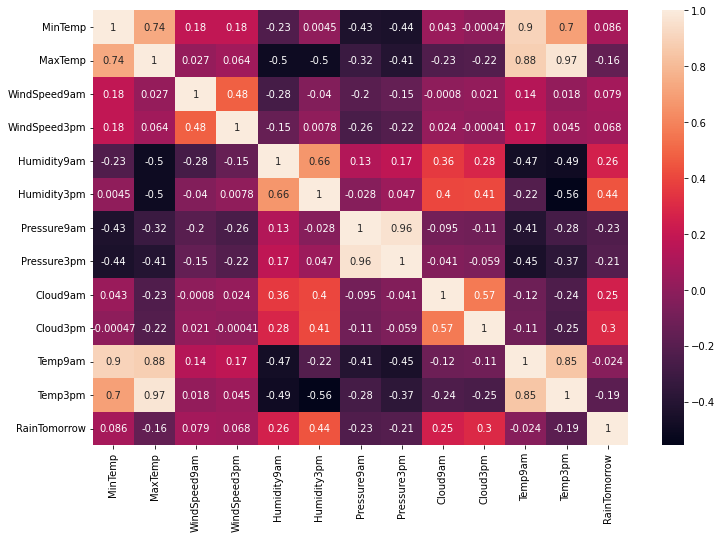

In [53]:
sns.heatmap(train[col].corr(),annot=True);

In [54]:
n_col=["WindSpeed_diff","Humidity_diff","Pressure_diff","Cloud_diff","Temp_diff",
       "MinMax_diff",'RainTomorrow']

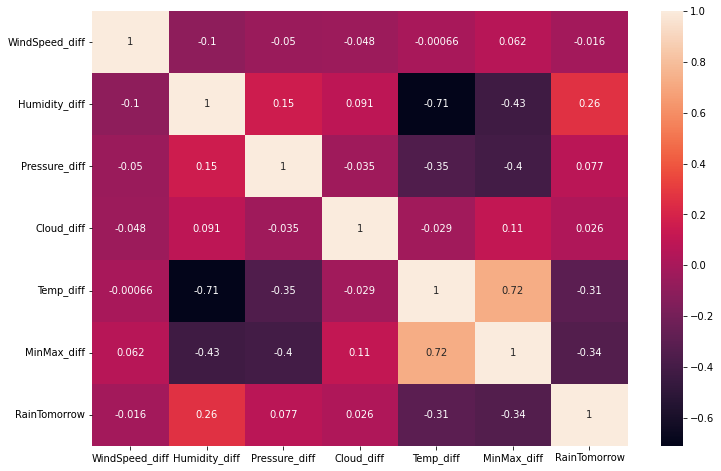

In [55]:
sns.heatmap(train[n_col].corr(),annot=True);

**We can clearly see the difference feature is more strongly correlated with target column then the individual column for**

* **MinMax_diff(-0.34)**
1. MinTemp(0.086)
1. MaxTemp(-0.16)

* **Temp_diff(-0.31)**
1. Temp9am(-0.024)
1. Temp3pm(-0.19)

In [56]:
drop_col=["WindSpeed_diff","Humidity_diff","Pressure_diff","Cloud_diff",
          "MinTemp", "MaxTemp","Temp9am", "Temp3pm","RainTomorrow"]

In [57]:
X_train=train.drop(drop_col,axis=1)
y_train=train["RainTomorrow"]

X_test=test.drop(drop_col,axis=1)
y_test=test["RainTomorrow"]

**Modelling**

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, confusion_matrix, classification_report

**No of features**

In [59]:
X_train.shape[1]

111

**The most important parameters to tune in Neural Networks are** 
* learning rate (alpha)
* regularization parameter (lambda)
* no of hidden units

(Beta1 and Beta2 are used in optimization algorithm for smoothing the batch implementation convergence and default values always work)
* Beta-1 (0.90)
* Beta-2 (0.99)

no of units in hidden layers
(Changing no of layers is used because decreasing layers results in expotential increase in no of units)

**Model**

In [60]:
model=Sequential()
model.add(Dense(units=20,input_dim=111,activation="relu"))
model.add(Dense(units=20,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=5,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                2240      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

2022-04-22 12:09:43.035049: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [61]:
earlystopping=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=50,restore_best_weights=True)

In [62]:
opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [63]:
history = model.fit(X_train,y_train,batch_size=64,epochs=1000,
                      callbacks=[earlystopping],validation_data=(X_test,y_test))

2022-04-22 12:09:44.230508: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
1857/1857 [==============================] - 7s 3ms/step - loss: 1.1071 - accuracy: 0.7501 - val_loss: 0.5132 - val_accuracy: 0.7840
Epoch 2/1000
1857/1857 [==============================] - 5s 3ms/step - loss: 0.5266 - accuracy: 0.7754 - val_loss: 0.4930 - val_accuracy: 0.7840
Epoch 3/1000
1857/1857 [==============================] - 5s 3ms/step - loss: 0.4793 - accuracy: 0.7821 - val_loss: 0.4221 - val_accuracy: 0.8208
Epoch 4/1000
1857/1857 [==============================] - 6s 3ms/step - loss: 0.4246 - accuracy: 0.8178 - val_loss: 0.3997 - val_accuracy: 0.8355
Epoch 5/1000
1857/1857 [==============================] - 6s 3ms/step - loss: 0.4112 - accuracy: 0.8264 - val_loss: 0.3927 - val_accuracy: 0.8370
Epoch 6/1000
1857/1857 [==============================] - 6s 3ms/step - loss: 0.4047 - accuracy: 0.8304 - val_loss: 0.3891 - val_accuracy: 0.8359
Epoch 7/1000
1857/1857 [==============================] - 6s 3ms/step - loss: 0.3986 - accuracy: 0.8319 - val_loss: 0.3824 -

In [64]:
history_df = pd.DataFrame(history.history)

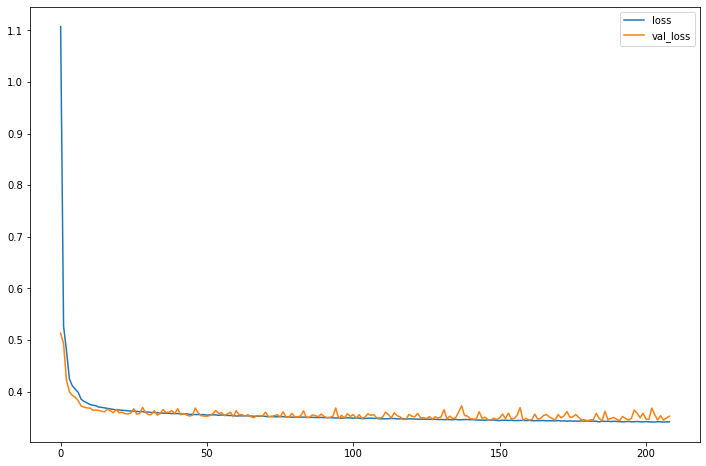

In [65]:
history_df[["loss","val_loss"]].plot();

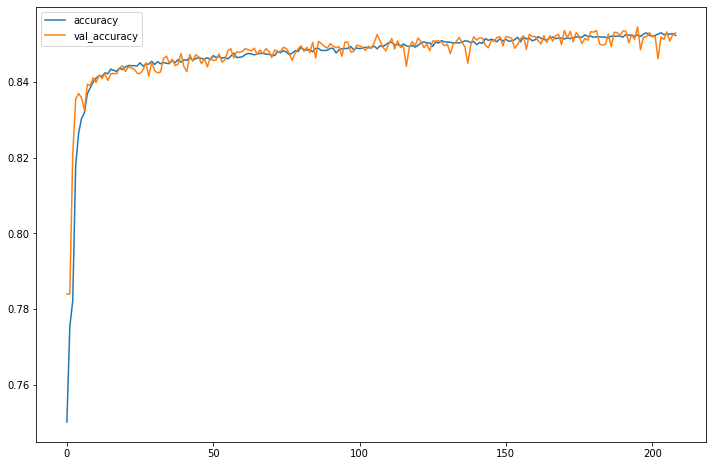

In [66]:
history_df[["accuracy","val_accuracy"]].plot();

**Predictions**

In [67]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

In [68]:
print(f"f1 score: {f1_score(y_test,y_pred)}")

f1 score: 0.585882984433709


In [69]:
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[15677   744]
 [ 2342  2183]]


In [70]:
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

classification_report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     16421
           1       0.75      0.48      0.59      4525

    accuracy                           0.85     20946
   macro avg       0.81      0.72      0.75     20946
weighted avg       0.84      0.85      0.84     20946



In [71]:
cf_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

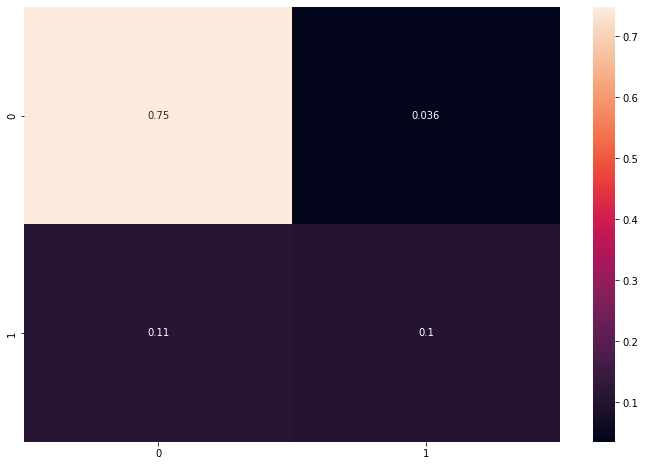

In [72]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True)